## Imports

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
import os

## Loading Data

In [2]:
folder = "data/rlcs-202122/"
folder_m = folder + 'winter-major/'

os.makedirs(folder_m, exist_ok=True) 

main = pd.read_csv(folder + 'main.csv', low_memory=False, encoding='utf8')

teams_g = pd.read_csv(folder + 'games_by_teams.csv', low_memory=False, encoding='utf8')
players_g = pd.read_csv(folder + 'games_by_players.csv', low_memory=False, encoding='utf8')

teams_bo = pd.read_csv(folder + 'matches_by_teams.csv', low_memory=False, encoding='utf8')
players_bo = pd.read_csv(folder + 'matches_by_players.csv', low_memory=False, encoding='utf8')



## Taking Winter Major data only

In [4]:
main_wmajor = main.loc[(main['event'] == 'Major') & (main['event_split'] == 'Winter')]
main_wmajor.to_csv(folder_m+'main_wmajor.csv')  
len(main_wmajor) # = nombre de matchs joué

171

In [5]:
players_bo_wmajor = players_bo[players_bo['match_id'].isin(main_wmajor['match_id'])]
players_bo_wmajor.to_csv(folder_m+'players_bo_wmajor.csv')  
len(players_bo_wmajor) 

228

In [6]:
teams_bo_wmajor = teams_bo[teams_bo['match_id'].isin(main_wmajor['match_id'])]
teams_bo_wmajor.to_csv(folder_m+'teams_bo_wmajor.csv')  
len(teams_bo_wmajor) # nombre de BOs joué x2 (2 équipes par BO)

76

In [7]:
players_g_wmajor = players_g[players_g['game_id'].isin(main_wmajor['game_id'])]
players_g_wmajor.to_csv(folder_m+'players_g_wmajor.csv')  
len(players_g_wmajor)

1026

In [8]:
teams_g_wmajor = teams_g[teams_g['game_id'].isin(main_wmajor['game_id'])]
teams_g_wmajor.to_csv(folder_m+'teams_g_wmajor.csv')  
len(teams_g_wmajor) # nombre de matchs joués x2 (2 équipes par match)

342

## First few graphs

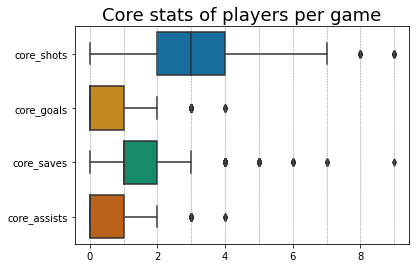

In [9]:
ax = sns.boxplot(data=players_g_wmajor.loc[:, "core_shots":"core_assists"], orient='h', palette="colorblind")
ax.set_title(label = "Core stats of players per game", fontsize = 18)
ax.vlines(range(10), ax.get_ylim()[0], ax.get_ylim()[1], color='gray', linestyles='dashed', linewidths=0.5);

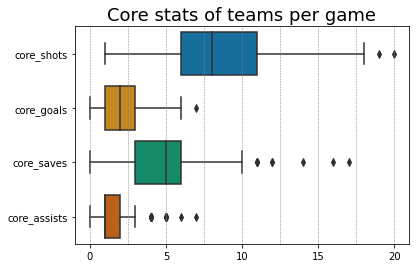

In [10]:
ax = sns.boxplot(data=teams_g_wmajor.loc[:, "core_shots":"core_assists"], orient='h', palette="colorblind")
ax.set_title(label = "Core stats of teams per game", fontsize = 18)
ax.set_xticks(range(0, 21, 5))
ax.vlines(np.arange(0,21, 2.5), ax.get_ylim()[0], ax.get_ylim()[1], color='gray', linestyles='dashed', linewidths=0.5);

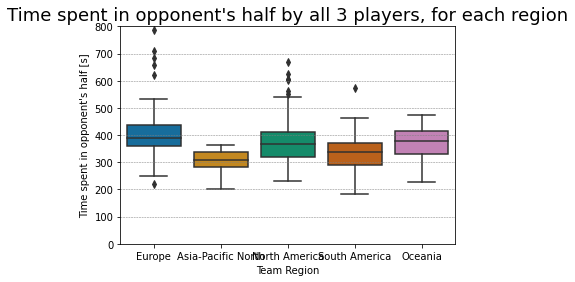

In [11]:
ax = sns.boxplot(y=teams_g_wmajor['positioning_time_offensive_half'], x=teams_g_wmajor['team_region'], palette="colorblind")
ax.hlines(range(0,800, 100), ax.get_xlim()[0], ax.get_xlim()[1], color='gray', linestyles='dashed', linewidths=0.5);
ax.set_ylim([0,800])
ax.set_ylabel("Time spent in opponent's half [s]")
ax.set_xlabel("Team Region");
ax.set_title(label = "Time spent in opponent's half by all 3 players, for each region", fontsize=18);

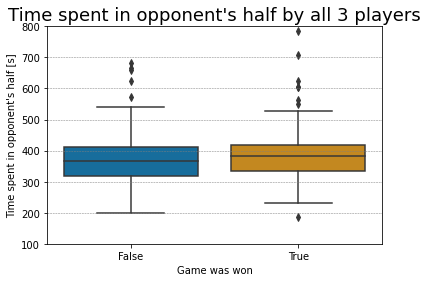

In [12]:
ax = sns.boxplot(y=teams_g_wmajor['positioning_time_offensive_half'], x=teams_g_wmajor['winner'], palette="colorblind")
ax.hlines(range(0,800, 100), ax.get_xlim()[0], ax.get_xlim()[1], color='gray', linestyles='dashed', linewidths=0.5);
ax.set_ylim([100,800])
ax.set_ylabel("Time spent in opponent's half [s]")
ax.set_xlabel("Game was won");
ax.set_title(label = "Time spent in opponent's half by all 3 players", fontsize=18);

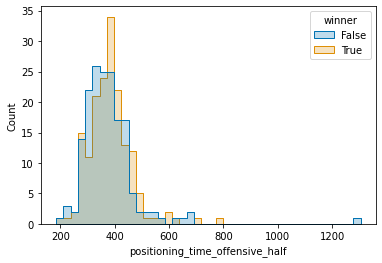

In [13]:
ax = sns.histplot(data=teams_g_wmajor, x="positioning_time_offensive_half", element='step', hue="winner", palette="colorblind")